In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('50_Startups.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<ipython-input-5-a542e48d5a97>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

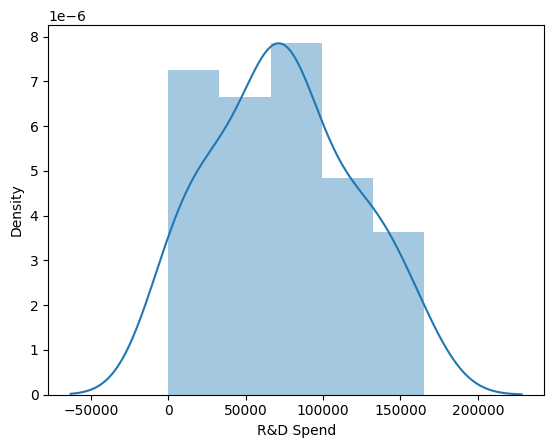

In [ ]:
import seaborn as sns
sns.distplot(data['R&D Spend'])

In [ ]:
#
# Normality Test
# =============================================================================================
#
# Checking whether the given column has Normal Distribution | Gaussian Distribution (Bell Curve)
#
# =============================================================================================
#
#
# Perform Hypothesis Test
#
# 1. Create a Viable Question (Binary Outcome)
#
# Goal: Check if RDSpend is Normally distributed
#
# 2. Convert the question into Hypothesis (H0 and Ha)
#
#  Null Hypothesis (H0) --- RDSpend is NOT Normally Distributed
#  Alt  Hypothesis (H1) --- RDSpend is Normally Distributed
#
# 3. Select the statistical test to validate the hypothesis (Who wins?)
#
#   Normality Test ---- Shapiro Test
#
# 4. Select/Determine the SL of the project
#
#  SL = 0.05
#
# 5. Calc the pvalue and compare the same with the SL to determine who Wins

SL = 0.05

from scipy.stats import shapiro

w_statistic,pvalue = shapiro(data['R&D Spend'])

if pvalue >= SL:
  print("Alt  Hypothesis (H1) --- RDSpend is Normally Distributed")
  print(w_statistic,pvalue)
else:
  print("Null Hypothesis (H0) --- RDSpend is NOT Normally Distributed")
  print(w_statistic,pvalue)

Alt  Hypothesis (H1) --- RDSpend is Normally Distributed
0.9673417428015927 0.1800580334188273


In [ ]:
#Skewness and Kurtosis
#The above two are the numerical metrics to quantify deviation from normality
#
# a. Skewness: Measuring asymmetry in normal distribution ( If value is close to 0, its normal dist column)
# b. Kurtosis: Measuring the peakedness. (Should be close to 3 for normal data)

print(data['R&D Spend'].skew())
print(data['R&D Spend'].kurt())

0.164002172321177
-0.7614645568424674


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
# Test For Feature Elimination
# ================================================================================================
# The goal of this technique is to identify which column/variable in my dataset can HIGHLY CONTRIBUTE
# for knowledge Discovery/Pattern Extraction/Intelligence Extraction.
#
# Its all about identifying which columns can help BETTER UNDERSTAND the POPULATION'S PATTERN.
#
# a. Parametric Test:
# ===============================================================================================
# If the given two columns are passing NORMALITY TEST, you can use Parametric Test using the following rule
#
#   H0 ------ Eliminate one of the features/columns/variables
#   Ha ------ Preserve Both Features/columns/variables
#
#
# b. Non-Parametric Test:
# ===============================================================================================
# If any one column is failing NORMALITY TEST, you can use Non-Parametric Test using the following rule
#
#   H0 ------ Eliminate one of the features/columns/variables
#   Ha ------ Preserve Both Features/columns/variables

In [ ]:
# Check if RDSpend and Admin and Statistically Same
#
#
#
# Perform Hypothesis Test
#
# 1. Create a Viable Question (Binary Outcome)
#
# Goal: Check if RDSpend and Admin and Statistically Same
#
# 2. Convert the question into Hypothesis (H0 and Ha)
#
#  Null Hypothesis (H0) --- RDSpend and Admin are Statistically Same. Therefore ELIMINATE one of them
#  Alt  Hypothesis (H1) --- RDSpend and Admin are Statistically Different. Therefore Preserve them
#
# 3. Select the statistical test to validate the hypothesis (Who wins?)
#
#  Student Ttest (Parametric)
#
# 4. Select/Determine the SL of the project
#
#  SL = 0.05
#
# 5. Calc the pvalue and compare the same with the SL to determine who Wins

SL = 0.05

from scipy.stats import ttest_ind

_,pvalue = ttest_ind(data['R&D Spend'], data['Administration'])

if pvalue <= SL:
  print("Alt  Hypothesis (H1) --- RDSpend and Admin are Statistically Different. Therefore Preserve them")
else:
  print("Null Hypothesis (H0) --- RDSpend and Admin are Statistically Same. Therefore ELIMINATE one of them")


Alt  Hypothesis (H1) --- RDSpend and Admin are Statistically Different. Therefore Preserve them


# NOTE: For this dataset, its Parametric. The below code for Non-parametric is just to Demonstrate the coding of Non-parametric test

In [ ]:
# Check if RDSpend and Admin and Statistically Same
#
#
#
# Perform Hypothesis Test
#
# 1. Create a Viable Question (Binary Outcome)
#
# Goal: Check if RDSpend and Admin and Statistically Same
#
# 2. Convert the question into Hypothesis (H0 and Ha)
#
#  Null Hypothesis (H0) --- RDSpend and Admin are Statistically Same. Therefore ELIMINATE one of them
#  Alt  Hypothesis (H1) --- RDSpend and Admin are Statistically Different. Therefore Preserve them
#
# 3. Select the statistical test to validate the hypothesis (Who wins?)
#
#  Wilcoxon (Non-Parametric)  {Instructor Note: Here I am assuming one of the column is not Normally Dist for coding purpose only. Review lecture recording :) }
#
# 4. Select/Determine the SL of the project
#
#  SL = 0.05
#
# 5. Calc the pvalue and compare the same with the SL to determine who Wins

SL = 0.05

from scipy.stats import wilcoxon

_,pvalue = wilcoxon(data['R&D Spend'], data['Administration'])

if pvalue <= SL:
  print("Alt  Hypothesis (H1) --- RDSpend and Admin are Statistically Different. Therefore Preserve them")
else:
  print("Null Hypothesis (H0) --- RDSpend and Admin are Statistically Same. Therefore ELIMINATE one of them")

Alt  Hypothesis (H1) --- RDSpend and Admin are Statistically Different. Therefore Preserve them


In [ ]:
#Perform Feature Elimination test on the following pairs

#RD vs Marketing
#RD vs Profit
#Admin vs Marketing
#Admin vs Profit

In [ ]:
#Chi-square Tet for Feature Elimination
#
# It is meant to deal with feature(independent variable) and label(dependent variable) pair.
#
# a. Feature is categorical and label is numerical
# b. Feature is categorical and label is categorical
# c. Feature is numerical and label is categorical

# The goal of this test is to check whether there exists any kind of statistical relationship between two columns

In [ ]:
# Check if State and Profit have any statistical relationship

# Data must be represented as a Contigency Table/Pivot Table
#
#

ct = pd.crosstab(data['State'],data['Profit'])

# pd.crosstab(featureCol,labelCol)

In [ ]:
ct

Profit,14681.40,35673.41,42559.73,49490.75,64926.08,65200.33,69758.98,71498.49,77798.83,78239.91,...,149759.96,152211.77,155752.60,156122.51,156991.12,166187.94,182901.99,191050.39,191792.06,192261.83
State,,,,,,,,,,,,,,,,,,,,,
California,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
Florida,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
New York,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
SL = 0.05

from scipy.stats import chi2_contingency

_,pvalue,_,_ = chi2_contingency(ct)

if pvalue <= SL:
  print("Ha ----- State and Profit has some Statistical Relationship. This Preserve State column")
else:
  print("H0 ----- State and Profit has no Statistical Relationship. Thus ELIMINATE 'State' Column")

H0 ----- State and Profit has no Statistical Relationship. Thus ELIMINATE 'State' Column


In [ ]:
#Parametric  and Nonparametric whereever applicable for Melb  dataset
# All numerical columns. Check which columns to preserve and which one to eliminate

#Ctrl + /

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Column list
list2 = ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
         'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
         'Longtitude', 'Propertycount']

# Wilcoxon Test for adjacent columns
SL = 0.05
for i in range(len(list2) - 1):  # Iterate over index pairs
    col1 = list2[i]
    col2 = list2[i + 1]

    # Perform Wilcoxon test
    stat, pvalue = wilcoxon(d1[col1], d1[col2])

    # Output results
    print(f"Wilcoxon Test between {col1} and {col2}:")
    print(f"Statistic: {stat}, p-value: {pvalue}")
    if pvalue <= SL:
        print(f"Reject Null Hypothesis: {col1} and {col2} are significantly different.\n")
    else:
        print(f"Fail to Reject Null Hypothesis: {col1} and {col2} are not significantly different.\n")